# Vlasov Dispersion Relation Without Landau Damping (Kappa Distribution)

In [2]:
import numpy as np
from prettytable import PrettyTable
import os
import matplotlib.pyplot as plt
import plasmapy.mathematics
import scipy.signal
from scipy import special as sp
import scipy.optimize as op
from scipy import integrate
import quadpy
%config InlineBackend.figure_format = 'svg'

In [34]:
k = 0.2
L = 2*np.pi/k
tem = 1  # 温度
kappa = 5.0

vmax = 5. # 速度最大值
q = 1.0
v_th = np.sqrt(2*tem)
# 等离子体参量
dens = 1
l_D = np.sqrt( tem / dens / q**2 ) # $\lambda_D^2$
w_pe = np.sqrt( dens * q**2 )
print('k*l_D = ',k*l_D)
print('w_pe  = ',w_pe)

k*l_D =  0.2
w_pe  =  1.0


In [121]:
def dispersion_function(zeta):
    r = 0.0
    A_kappa = (kappa)**(-1.5) * sp.gamma(kappa+1) / sp.gamma(kappa-0.5)
    def integrand(xi):
        return  (1+xi**2/kappa)**(-kappa-1)
    x = 1e-5
    s_p = zeta + x
    s_n = zeta - x
    real1 = (1/np.sqrt(np.pi)) * integrate.quad(integrand,s_n,s_p, weight='cauchy',wvar=zeta)[0]
    real2 = (1/np.sqrt(np.pi)) * quadpy.quad(lambda xi: integrand(xi)/(xi-zeta),-np.inf,s_n)[0]
    real3 = (1/np.sqrt(np.pi)) * quadpy.quad(lambda xi: integrand(xi)/(xi-zeta),s_p,np.inf)[0]
    real = real1+real2+real3
    r = real
    return r * A_kappa

def VlasovPDRK(w,k):
    v_th_kappa = np.sqrt(2-3/kappa) * np.sqrt(tem)
    zeta = w / k /v_th_kappa
    r = 1 + (kappa/(kappa-1.5)) * 1 / k**2 / l_D**2 * ( 1 - 1/2/kappa + zeta*dispersion_function(zeta).real )
    return r

In [122]:
def SolveVlasovPDRK(k,w_init):
    s=op.root(lambda w:VlasovPDRK(w,k),w_init)
    if s.success==True:
        r = s
    return r

In [123]:
w_up_list = np.array([])
w_down_list = np.array([])
k_list = np.linspace(0.1,0.52,num=40)
print('k = ',k_list)

k =  [0.1        0.11076923 0.12153846 0.13230769 0.14307692 0.15384615
 0.16461538 0.17538462 0.18615385 0.19692308 0.20769231 0.21846154
 0.22923077 0.24       0.25076923 0.26153846 0.27230769 0.28307692
 0.29384615 0.30461538 0.31538462 0.32615385 0.33692308 0.34769231
 0.35846154 0.36923077 0.38       0.39076923 0.40153846 0.41230769
 0.42307692 0.43384615 0.44461538 0.45538462 0.46615385 0.47692308
 0.48769231 0.49846154 0.50923077 0.52      ]


In [124]:
s=op.root(lambda w:VlasovPDRK(w,0.1),0.1,method='lm')
print(s)

c:\users\rguo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
c:\users\rguo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if __name__ == '__main__':


AssertionError: 

In [134]:
w_list = np.linspace(0.1,1.8,num=200)

In [144]:
kappa = 2.3
pdr = np.array([])
for w in w_list:
    pdr=np.append(pdr,VlasovPDRK(w,0.1))

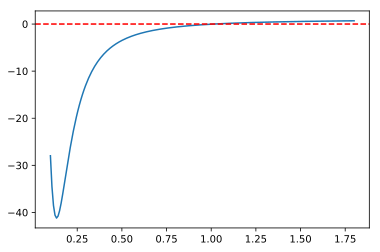

In [145]:
ax = plt.gca()
ax.plot(w_list,pdr)
ax.axhline(0,linestyle='--',color='r')